## Supervised Learning

Machine learning has a few flavors of problems. We can think of it as ways to THINK about a problem. If we can think about a problem in this way, it gives us a framework to solve it. Suppose we have a random variable we can observe like height $H$, and a variable we want to predict like gender $G$. We know that $height$ doesn't determine gender, there are tall women and short men. Lets say we measure somebodies hight as $67$ inches and we want a predictor to estimate gender. Suppose we can compute a probability $P(G|H)$. Then if we plug in what we know (and assume men and women are equal in the population) ... we have numbers $A$ and $B$.

$$A = P(G=\mbox{Male}| H=67), B = P(G=\mbox{Female}| H=67)$$

Then if $A > B$ then it is more probable that the person is male and if $B > A$ then it is more likely it is a women. We can say this as

$$ G^* = \mbox{argmax}_G P(G| H=67)$$

So $G^*$ is formally our best guess. We don't have lots of data on people who are exactly $67$ inches tall so we need to flip this a bit using Bayes formula. It follows from $P(G,H) = P(G|H)*P(H) = P(H|G)*P(G)$

$$ P(G|H) = P(H|G)*P(G)/P(H) $$

Now we are going to be told that $H=171$ so when we compare $G=$Male and $G=$Female, it doesn't matter what $P(H)$ is in terms of if $A>B$ or $B>A$. Also we are going to assume $P(G)$ is equal so again, since it is the same for both sides, it doesn't matter. So all we need to do is compute $P(H|G)$ which is easier. Why? Because this is the distribution of Men's heights and separately the distribution of Women's heights. We can estimate that somehow (assume normal ... whatever).


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

In [35]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
import seaborn as sns

/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


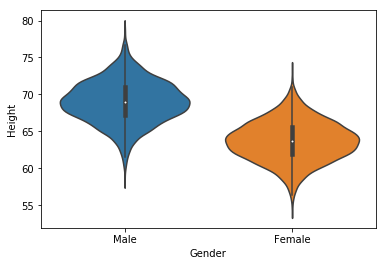

In [41]:
sns.violinplot(x='Gender', y='Height', data=df[['Gender', 'Height']])

In [42]:
df[['Height',"Gender"]].groupby("Gender").describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              
              75%        max  
Gender                        
Female  65.563565  73.389586  
Male    70.988744  78.998742

In [43]:
male_heights = (df[df['Gender']=='Male']['Height']).values
female_heights = (df[df['Gender']=='Female']['Height']).values

In [45]:
print(male_heights.mean(),male_heights.std())
print(female_heights.mean(),female_heights.std())

69.02634590621741 2.863075878119538
63.70877360342507 2.696014373880709


In [47]:
from scipy import stats
rv_male = stats.norm(loc=male_heights.mean(), scale=male_heights.std())
rv_female = stats.norm(loc=female_heights.mean(), scale=female_heights.std())

In [52]:
heights = np.linspace(55,79,1000)
male_probs = rv_male.pdf(heights)
female_probs = rv_female.pdf(heights)

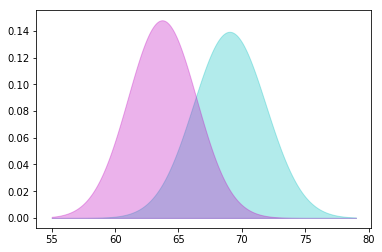

In [59]:
plt.fill_between(heights, male_probs, color='c', alpha=0.3)
plt.fill_between(heights, female_probs, color='m', alpha=0.3)

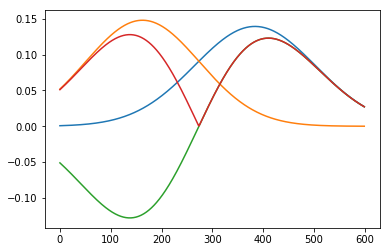

In [72]:
plt.plot(male_probs[200:-200])
plt.plot(female_probs[200:-200])
plt.plot(male_probs[200:-200]-female_probs[200:-200])
plt.plot(np.abs(male_probs[200:-200]-female_probs[200:-200]))

In [74]:
threshold = heights[200:-200][np.argmin(np.abs(male_probs[200:-200]-female_probs[200:-200]))]
threshold

66.36336336336336

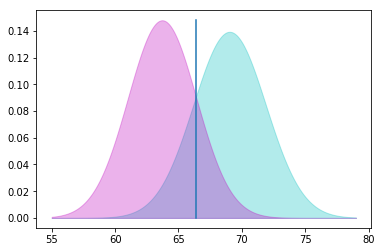

In [75]:
plt.fill_between(heights, male_probs, color='c', alpha=0.3)
plt.fill_between(heights, female_probs, color='m', alpha=0.3)
plt.plot([threshold,threshold],[0,max([male_probs.max(),female_probs.max()])])

This is called the generative approach because we have to model our data well enough to build a probability for it. What if we have multi-dimensional data. This seems extra hard. All we really want to do is fit a function that tells us given an input in inches whether it is male or female. That is a discriminative approach.

## Iris Data Sets
Lets think about the Iris data set. Lets say we measure 4 variables of different iris flowers. Lets say there are 3 species (Iris setosa, Iris virginica and Iris versicolor) of this data and we want to classify which species  we are looking at. Lets say the species is a random variable $S$, and the four attributes are $W$, $X$, $Y$, $Z$. Assume we measure $W,X,Y,Z$ for a particular flower $F$. It is not clear that those properties will with 100% certainty. Lets use conditional probability to express our knowledge.

$$ P(S | W, X, Y, X) $$

is the probability of a species $S$ given we measured the other variables. We want to figure out which species it is given the four attributes.

In [76]:
from sklearn import datasets
iris = datasets.load_iris()

In [77]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [78]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


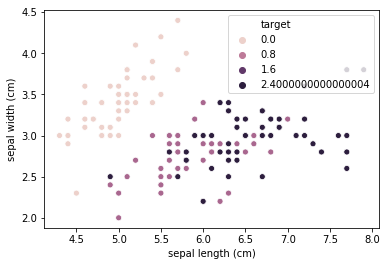

In [81]:
 ax = sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=iris_df)

In [82]:
from sklearn import neighbors

In [ ]:
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n)